# Problem 3

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load data
df = pd.read_parquet('train.parquet')

In [3]:
# Filter for "Target Drug" incidents only
df_target = df[df['Incident'] == 'TARGET DRUG']

In [4]:
# Create a new column for month
df_target['Month'] = df_target['Date'].dt.month

C:\TEMP\ipykernel_18764\2125131867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target['Month'] = df_target['Date'].dt.month


In [5]:
# Create a pivot table to count the number of incidents for each patient and month
df_pivot = pd.pivot_table(df_target, values='Incident', index='Patient-Uid', columns='Month', aggfunc='count', fill_value=0)

In [6]:
# Convert pivot table to numpy array
X = df_pivot.to_numpy()
# Normalize matrix by row
df_norm = df_pivot.div(df_pivot.sum(axis=1), axis=0)

In [7]:
# Cluster patients using KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_norm)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

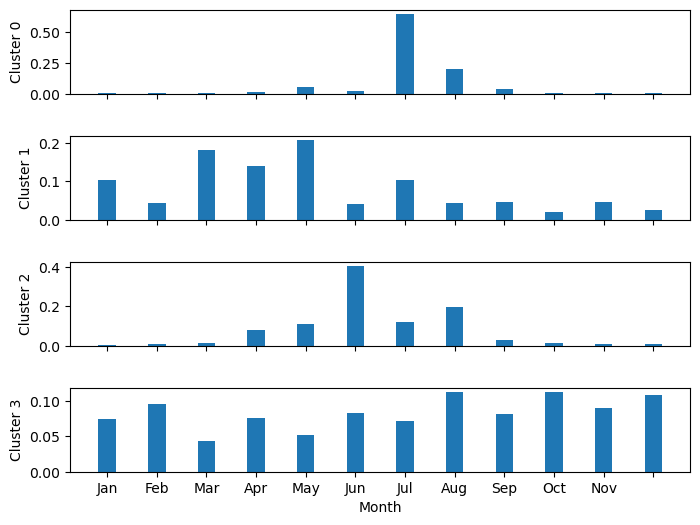

In [8]:
import calendar

# get cluster centers
cluster_centers = kmeans.cluster_centers_

# create bar plot
fig, ax = plt.subplots(kmeans.n_clusters, 1, figsize=(8, 6), sharex=True)
x = np.arange(len(cluster_centers[0]))
width = 0.35
for i, cluster in enumerate(cluster_centers):
    ax[i].bar(x, cluster, width)
    ax[i].set_ylabel(f'Cluster {i}')
ax[-1].set_xlabel('Month')

# set x-ticks and labels to represent months
month_labels = [calendar.month_name[(i+1) % 12][:3] for i in range(len(x))]
ax[-1].set_xticks(x)
ax[-1].set_xticklabels(month_labels)

# add some space for y-ticks
plt.subplots_adjust(hspace=0.5)

plt.show()

<Axes: xlabel='months', ylabel='Average prescription'>

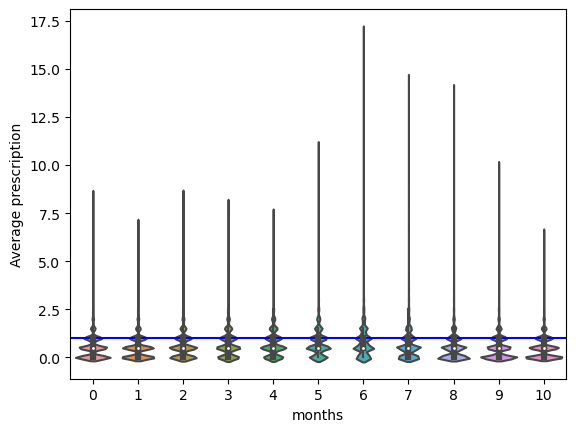

In [10]:
# Create an empty list to store the individual series
series_list = []

# Iterate through the range of columns
for i in range(0, len(df_pivot.columns) - 1):
    # Calculate the average of two sequential columns
    a = (df_pivot.iloc[:, i] + df_pivot.iloc[:, i+1]) / 2
   
    series_list.append(a)

# Combine the series into a single DataFrame
combined_df = pd.concat(series_list, axis=1)

# Plot the violin plot
plt.axhline(y=1, color='blue', linestyle='-')
plt.xlabel("months")
plt.ylabel("Average prescription")
sns.violinplot( data=combined_df)